# Stock

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Company Dataset

- import dataset

In [108]:
data = pd.read_csv('data/HPQ.csv', index_col=['Date'], parse_dates=['Date'])
data.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-22,21.620001,21.650000,21.180000,21.320000,20.614552,15246600
2019-01-23,21.410000,21.580000,21.190001,21.440001,20.730583,10037100
2019-01-24,21.549999,21.950001,21.510000,21.770000,21.049664,5623200
2019-01-25,21.940001,22.120001,21.840000,22.100000,21.368746,7290600
2019-01-28,21.830000,22.000000,21.680000,21.980000,21.252716,6033200
2019-01-29,22.120001,22.230000,21.850000,21.879999,21.156023,6811600
2019-01-30,22.090000,22.240000,21.910000,22.200001,21.465437,7559200
2019-01-31,22.200001,22.260000,22.010000,22.030001,21.301062,11203200
2019-02-01,22.160000,22.290001,21.930000,22.260000,21.523451,7946700


- Data cleaning

In [109]:
drop_cols = ['Adj Close','Volume' ]

data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Open,High,Low,Close
Date,,,,
2019-01-22,21.620001,21.650000,21.180000,21.320000
2019-01-23,21.410000,21.580000,21.190001,21.440001
2019-01-24,21.549999,21.950001,21.510000,21.770000
2019-01-25,21.940001,22.120001,21.840000,22.100000
2019-01-28,21.830000,22.000000,21.680000,21.980000


- Plot the closing price

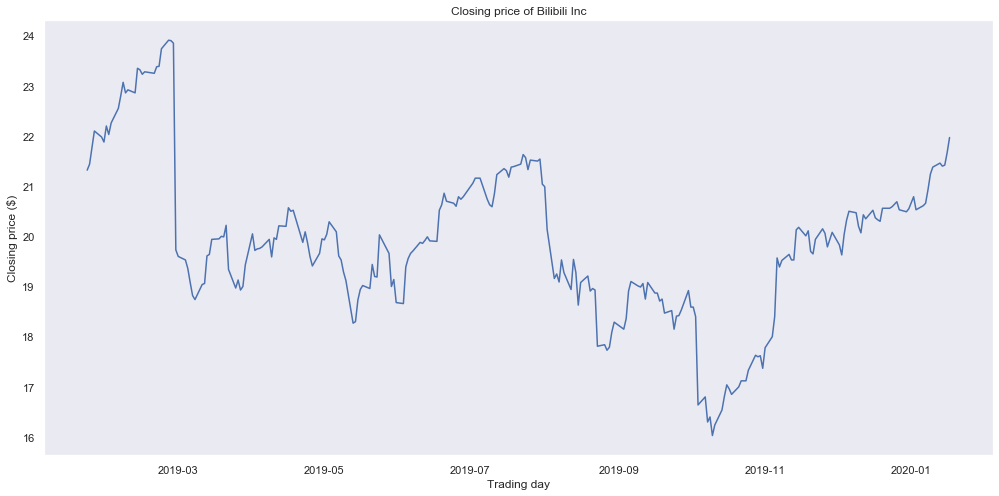

In [110]:
plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of Bilibili Inc')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

- Double Exponential Smoothing

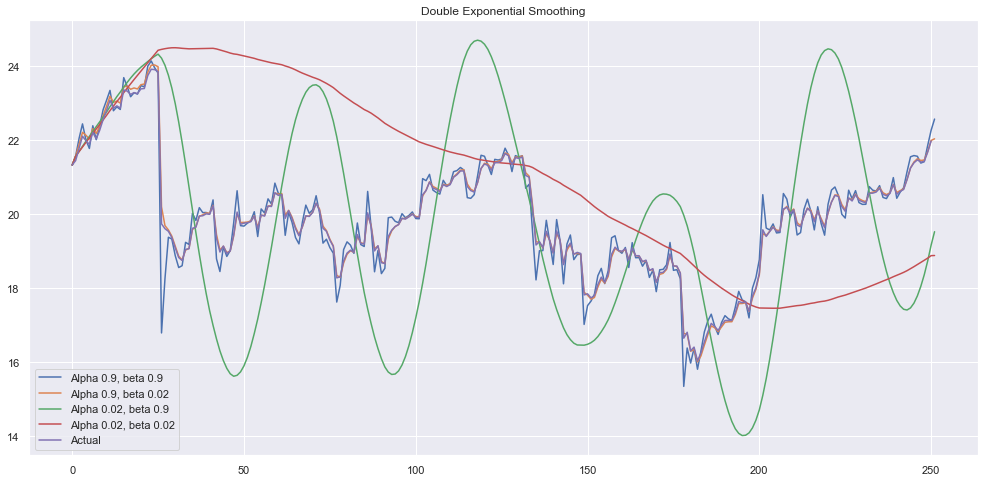

In [111]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

- Stationary

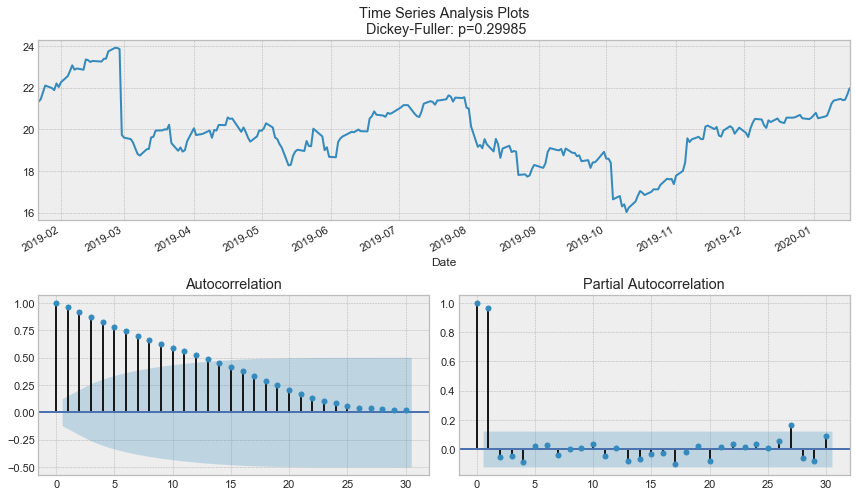

In [112]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

- By the Dickey-Fuller test, the time series is non-stationary.

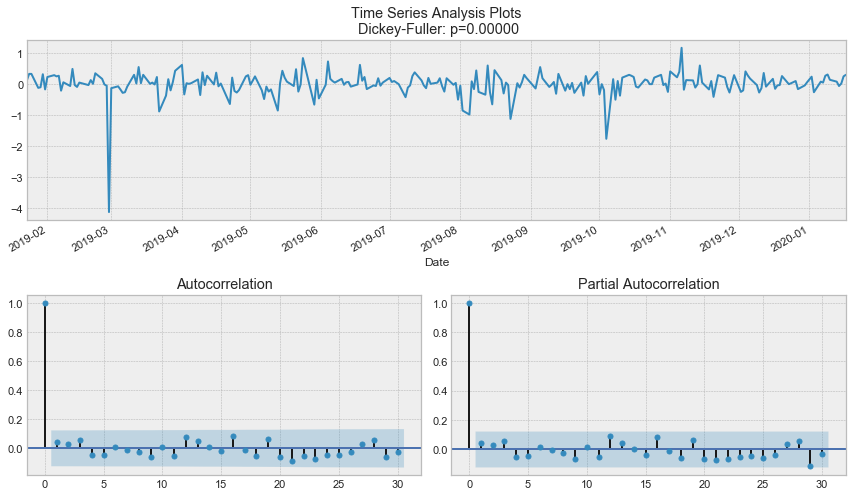

In [113]:
# Take the first difference to remove to make the process stationary
data_diff = data.Close - data.Close.shift(1)

tsplot(data_diff[1:], lags=30)

- Random Forests

In [114]:
data.head()

,Open,High,Low,Close
Date,,,,
2019-01-22,21.620001,21.650000,21.180000,21.320000
2019-01-23,21.410000,21.580000,21.190001,21.440001
2019-01-24,21.549999,21.950001,21.510000,21.770000
2019-01-25,21.940001,22.120001,21.840000,22.100000
2019-01-28,21.830000,22.000000,21.680000,21.980000


In [115]:
### Data transformations
data.columns = [x.strip() for x in data.columns]
data.columns = [x.replace(' ', '_') for x in data.columns]

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [117]:
data.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [118]:
pd.concat([data.Close, data.Close.shift(-1)], axis=1)

,Close,Close
Date,,
2019-01-22,21.320000,21.440001
2019-01-23,21.440001,21.770000
2019-01-24,21.770000,22.100000
2019-01-25,22.100000,21.980000
2019-01-28,21.980000,21.879999
...,...,...
2020-01-13,21.459999,21.400000
2020-01-14,21.400000,21.420000
2020-01-15,21.420000,21.670000


In [125]:
def valid(col):
    return 'Close' not in col
data = data.dropna()
res = 1
d = 1
score = []
day = []
while res > 0.7:
    X = data[[x for x in data.columns if valid(x)]].iloc[:-d]
    y = data.Close.shift(-d).dropna()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    res = rf_model.score(X_test, y_test)
    score.append(res)
    day.append(d)
    d+=1

In [126]:
X.T

Date,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-04,...,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08
Open,21.620001,21.410000,21.549999,21.940001,21.83,22.120001,22.09,22.200001,22.160000,22.27,...,20.559999,20.620001,20.690001,20.500000,20.41,20.68,20.480000,20.660000,20.559999,20.530001
High,21.650000,21.580000,21.950001,22.120001,22.00,22.230000,22.24,22.260000,22.290001,22.60,...,20.740000,20.799999,20.730000,20.639999,20.57,20.83,20.680000,20.790001,20.780001,20.990000
Low,21.180000,21.190001,21.510000,21.840000,21.68,21.850000,21.91,22.010000,21.930000,22.16,...,20.559999,20.610001,20.510000,20.389999,20.33,20.65,20.450001,20.510000,20.510000,20.530001


In [127]:
score[:-1]

[0.8605295675522628,
 0.7009428996230931,
 0.8114248789407492,
 0.8445302109802663,
 0.8464343143698766,
 0.7327535319892272]

In [128]:
#this is how far we can predict above 70% accurate rate  21 elements means we can predict 21 days
day[:-1]

[1, 2, 3, 4, 5, 6]

Text(0.5, 0, 'Predict Days')

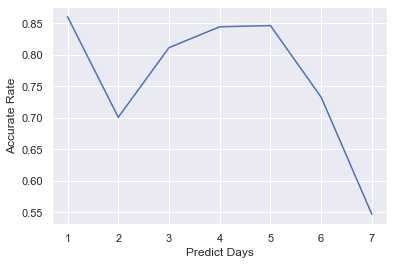

In [129]:
#generate analyze accurate rate versus predict day
plt.plot(day,score)
plt.ylabel('Accurate Rate')
plt.xlabel('Predict Days')


In [124]:
rf_model = RandomForestRegressor()

In [106]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [107]:
rf_model.score(X_test, y_test)

0.6779028587364272

In [ ]:
y_pred = rf_model.predict(X_test)

In [72]:
type(y_pred)

numpy.ndarray

In [73]:
y_pred[0:10]

array([48.2219993, 28.264    , 24.2649993, 28.8450001, 25.25     ,
       29.9880006, 25.958    , 31.915001 , 28.819    , 32.3770005])

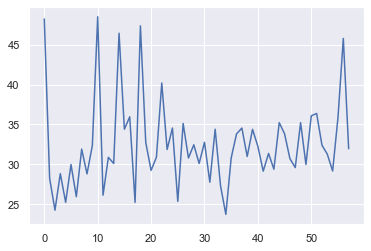

In [74]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

We need to convert a pandas series to a numpy array:

In [75]:
type(y_test)

pandas.core.series.Series

In [76]:
y_test2 = y_test.as_matrix()
type(y_test2)

numpy.ndarray

In [77]:
y_test2[0:10]

array([45.860001, 29.049999, 22.41    , 39.790001, 22.82    , 39.689999,
       25.059999, 39.41    , 28.76    , 31.700001])

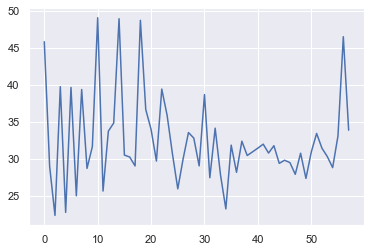

In [78]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

Now let's plot predictions on top of test labels to see if we have a match. We'll plot one under the other and then reverse them to see if the mismatch is big or not:

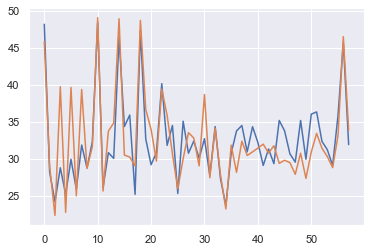

In [79]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

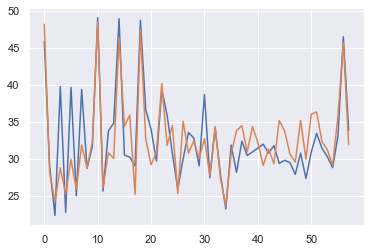

In [80]:
import matplotlib.pyplot as plt
plt.plot(y_test2)
plt.plot(y_pred)

In [81]:
type(y_test)

pandas.core.series.Series

In [82]:
pd.concat([pd.Series(y_pred), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,48.221999,45.860001
1,28.264000,29.049999
2,24.264999,22.410000
3,28.845000,39.790001
4,25.250000,22.820000
5,29.988001,39.689999
6,25.958000,25.059999
7,31.915001,39.410000
8,28.819000,28.760000
9,32.377001,31.700001


In [83]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Low', 0.3707607884533811),
 ('Open', 0.3695906643593952),
 ('High', 0.25964854718722374)]